# Table of Contents
 <p><div class="lev1"><a href="#パラメトリックブートストラップとベイズ推定の事後分布が"><span class="toc-item-num">1&nbsp;&nbsp;</span>パラメトリックブートストラップとベイズ推定の事後分布が</a></div><div class="lev1"><a href="#パラメトリックブートストラップがパラメーター間の相関を検出できることの確認"><span class="toc-item-num">2&nbsp;&nbsp;</span>パラメトリックブートストラップがパラメーター間の相関を検出できることの確認</a></div>

# パラメトリックブートストラップとベイズ推定の事後分布が



$\frac{dx}{dt}=a_1-a_2x$

# パラメトリックブートストラップがパラメーター間の相関を検出できることの確認

$x=a_1e^{(a_2-a_3)t}+\varepsilon$

相関があるモデルのパラメーターをブートストラップすると？
サンプリングの結果はちゃんと相関を見れる？

$\frac{dx}{dt}=(a-b)x$

この場合、$a=b$で一意に決まらないので、最小二乗で解くと、初期値$(a_0,b_0)$に依存して答えが変わる。

パラメトリックにリサンプリングされたとしても、初期値が一緒だったら答えは一緒？でもノイズがのっているので変わりそう

$x=e^{(a-b)t}+\varepsilon$

In [46]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def f(T, a):
    return np.exp((a[0]-a[1])*T)

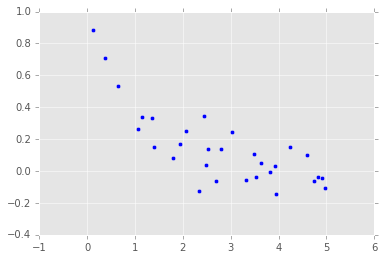

In [47]:
a_true = np.array([2, 3])
var = 0.1
data_t = np.random.rand(30) * 5
data_x = f(data_t, a_true) +  np.random.normal(0, var, len(data_t))
plt.scatter(data_t, data_x)

/Users/kazumasa/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


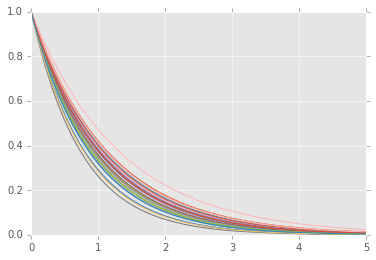

In [71]:
from scipy.optimize import least_squares

def calc_residuals(params, data_t, data_x):
    model_x = f(data_t, params)
    return model_x - data_x
col = ['red','black','blue']
var = 0.2
a_init = np.array([1, 1])
n_iter = 30
a_results = np.zeros([n_iter,2])
for i in range(n_iter):
    data_t = np.random.rand(40) * 5
    data_x = f(data_t, a_true) +  np.random.normal(0, var, len(data_t))
    res = least_squares(calc_residuals, a_init, args=(data_t, data_x))
    a_fit = res.x
    a_results[i,:] = a_fit
    line_t = np.linspace(0, 5)
    fit_x = f(line_t, a_fit)
    #plt.scatter(data_t, data_x, label=i, c=col[i])
    plt.plot(line_t, fit_x)
plt.legend()

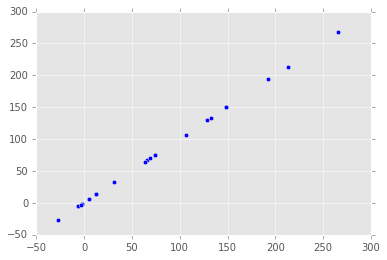

In [72]:
plt.scatter(a_results[:,0], a_results[:,1])